### Importing libraries

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set up a directory for outputs
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

### Loading Data 

In [3]:
# Step 1: Load Data
file_path = 'Assignment.xlsx'
excel_data = pd.ExcelFile(file_path)

In [4]:
# Checking sheet names
sheet_names = excel_data.sheet_names
print("Sheet Names:", sheet_names)

# Loading data from Excel sheets
user_details = pd.read_excel(excel_data, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(excel_data, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(excel_data, sheet_name='OrderDetails.csv')

Sheet Names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


In [5]:
# Add Age Groups
def assign_age_group(age):
    if pd.isnull(age): 
        return 'Unknown'
    elif age <= 18:
        return '0-18'
    elif age <= 30:
        return '19-30'
    elif age <= 45:
        return '31-45'
    elif age <= 60:
        return '46-60'
    else:
        return '60+'

# Apply the function to create an 'Age Group' column
user_details['Age Group'] = user_details['Age'].apply(assign_age_group)

# Verify Age Grouping
print("\nAge Groups in UserDetails:")
print(user_details['Age Group'].value_counts())


Age Groups in UserDetails:
Age Group
19-30    5
31-45    5
Name: count, dtype: int64


### Data Cleaning

In [6]:
# Step 2: Inspect and Clean Data
# Checking for missing values and duplicates in each dataset
def check_data_health(df, name):
    print(f"\n{name} - Missing Values:\n", df.isnull().sum())
    print(f"\n{name} - Duplicates: ", df.duplicated().sum())

check_data_health(user_details, "UserDetails")
check_data_health(cooking_sessions, "CookingSessions")
check_data_health(order_details, "OrderDetails")




UserDetails - Missing Values:
 User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Age Group            0
dtype: int64

UserDetails - Duplicates:  0

CookingSessions - Missing Values:
 Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

CookingSessions - Duplicates:  0

OrderDetails - Missing Values:
 Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

OrderDetails - Duplicates:  0


In [7]:
# Handling missing values
user_details['Total Orders'] = user_details['Total Orders'].fillna(0)
order_details_cleaned = order_details.dropna(subset=['Dish Name', 'Order Date'])

In [8]:
# Convert date columns to datetime format
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'], errors='coerce')
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'], errors='coerce')
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'], errors='coerce')
order_details_cleaned['Order Date'] = pd.to_datetime(order_details_cleaned['Order Date'], errors='coerce')

In [9]:
# Step 3: Merge Datasets
# Merge user details with cooking sessions
merged_data = user_details.merge(cooking_sessions, on='User ID', how='left')
# Merge with order details
merged_data = merged_data.merge(order_details_cleaned, on=['User ID', 'Session ID'], how='left')

# Remove duplicate columns (if any)
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

### Data Analyses

In [10]:
# Step 4: Analyze Relationships
# 4.1 Average Total Orders by Favorite Meal Type
avg_orders_by_meal = merged_data.groupby('Favorite Meal')['Total Orders'].mean().reset_index()

In [11]:
# 4.2 Most Popular Dishes
popular_dishes = merged_data['Dish Name_x'].value_counts().reset_index()
popular_dishes.columns = ['Dish Name_x', 'Order Count']

In [12]:
# 4.3 Average Total Orders by Age Group
avg_orders_by_age = user_details.groupby('Age Group')['Total Orders'].mean().reset_index()
print("\nAverage Orders by Age Group:")
print(avg_orders_by_age)



Average Orders by Age Group:
  Age Group  Total Orders
0     19-30           9.2
1     31-45           9.6


### Data Visualizations

C:\Users\91908\AppData\Local\Temp\ipykernel_24664\190152482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite Meal', y='Total Orders', data=avg_orders_by_meal, palette='viridis')


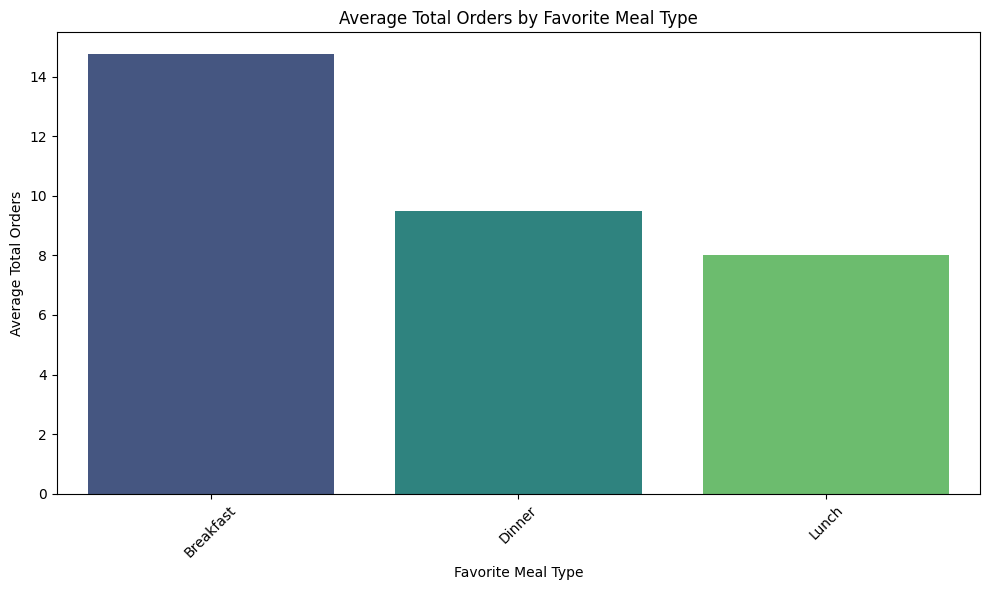

In [13]:
# Step 5: Visualizations
# 5.1 Average Total Orders by Favorite Meal Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Favorite Meal', y='Total Orders', data=avg_orders_by_meal, palette='viridis')
plt.title('Average Total Orders by Favorite Meal Type')
plt.xlabel('Favorite Meal Type')
plt.ylabel('Average Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'average_orders_by_meal.png'))
plt.show()

C:\Users\91908\AppData\Local\Temp\ipykernel_24664\3991537255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Count', y='Dish Name_x', data=popular_dishes.head(10), palette='magma')


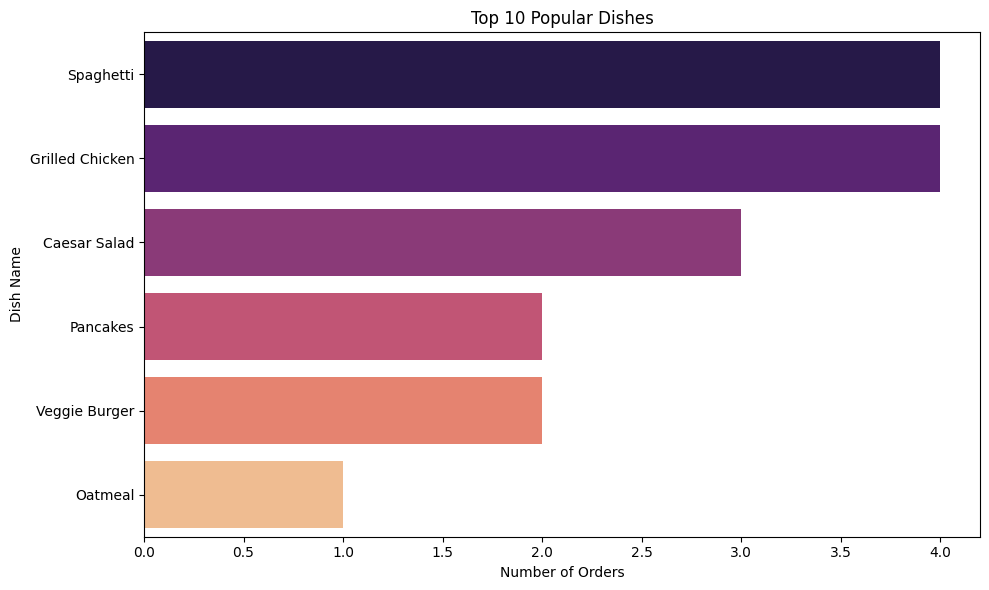

In [14]:
# 5.2 Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Count', y='Dish Name_x', data=popular_dishes.head(10), palette='magma')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'popular_dishes.png'))
plt.show()



C:\Users\91908\AppData\Local\Temp\ipykernel_24664\1811404610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Total Orders', data=avg_orders_by_age, palette='coolwarm', order=['0-18', '19-30', '31-45', '46-60', '60+', 'Unknown'])


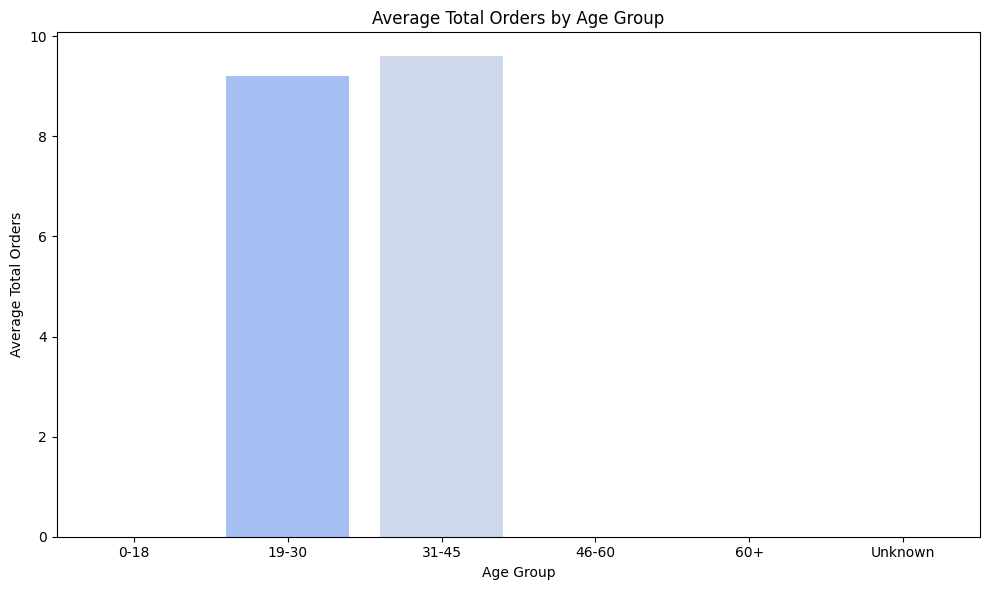

In [15]:
# 5.3 Average Total Orders by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Orders', data=avg_orders_by_age, palette='coolwarm', order=['0-18', '19-30', '31-45', '46-60', '60+', 'Unknown'])
plt.title('Average Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Orders')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'average_orders_by_age_group.png'))
plt.show()

### Saving Cleaned and Merged Data

In [16]:
# Step 6: Save Cleaned and Merged Data
output_file = os.path.join(output_dir, 'merged_data.csv')
merged_data.to_csv(output_file, index=False)

# Print Summary
print("\nFinal Merged Data Summary:")
print(merged_data.describe())
print(f"\nCleaned and merged data saved to: {output_file}")



Final Merged Data Summary:
             Age    Registration Date  Total Orders  \
count  18.000000                   18     18.000000   
mean   32.500000  2023-04-19 21:20:00     10.166667   
min    25.000000  2023-01-15 00:00:00      5.000000   
25%    28.000000  2023-02-20 00:00:00      8.000000   
50%    30.500000  2023-03-23 00:00:00      9.500000   
75%    35.000000  2023-06-09 00:00:00     12.000000   
max    42.000000  2023-10-10 00:00:00     15.000000   
std     5.554542                  NaN      3.166925   

                    Session Start                    Session End  \
count                          16                             16   
mean   2024-12-05 02:50:37.500000  2024-12-05 03:20:56.249999872   
min           2024-12-01 12:00:00            2024-12-01 12:20:00   
25%           2024-12-03 08:37:30            2024-12-03 08:58:45   
50%           2024-12-05 00:30:00            2024-12-05 00:57:30   
75%           2024-12-06 23:22:30            2024-12-07 00:00:00   


In [18]:
# Generate Business Recommendations
print("\nBusiness Recommendations:")
print("1. Focus on promoting the most popular dishes to drive further engagement.")
print("2. Enhance meal options that show high average orders (e.g., specific favorite meals).")


Business Recommendations:
1. Focus on promoting the most popular dishes to drive further engagement.
2. Enhance meal options that show high average orders (e.g., specific favorite meals).
